In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
Product = ['A','B','C','D','A','B','C','D']

In [135]:
Year = [
2015,
2015,
2015,
2015,
2016,
2016,
2016,
2016
]

In [136]:
Volume =[
2500,
1200,
800,
400,
3000,
1400,
1200,
800,
]

In [137]:
Price=[
1.25,
2.5,
2.75,
3,
1.23,
2.45,
2.7,
2.94
]

In [138]:
Revenue = [ a*b for (a,b) in zip( Volume , Price ) ]
Revenue

[3125.0, 3000.0, 2200.0, 1200, 3690.0, 3430.0000000000005, 3240.0, 2352.0]

In [139]:
table = { 'Product': Product, 'Year' : Year, 'Volume': Volume, 'Price' : Price , 'Revenue': Revenue   }

In [140]:
table

{'Product': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'],
 'Year': [2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016],
 'Volume': [2500, 1200, 800, 400, 3000, 1400, 1200, 800],
 'Price': [1.25, 2.5, 2.75, 3, 1.23, 2.45, 2.7, 2.94],
 'Revenue': [3125.0,
  3000.0,
  2200.0,
  1200,
  3690.0,
  3430.0000000000005,
  3240.0,
  2352.0]}

In [141]:
df= pd.DataFrame(data=  table  )
df

,Product,Year,Volume,Price,Revenue
0,A,2015,2500,1.25,3125.0
1,B,2015,1200,2.50,3000.0
2,C,2015,800,2.75,2200.0
3,D,2015,400,3.00,1200.0
4,A,2016,3000,1.23,3690.0
5,B,2016,1400,2.45,3430.0
6,C,2016,1200,2.70,3240.0
7,D,2016,800,2.94,2352.0


### **Q. At overall level what is the Volume, Price, Revenue change from 2015 to 2016.**

**Solutions :**

In [142]:
Total_all =  df.groupby( by = ['Year'] )

In [143]:
Year_by_total = Total_all.sum()
Year_by_total

,Volume,Price,Revenue
Year,,,
2015,4900,9.50,9525.0
2016,6400,9.32,12712.0


#### Volume Change

In [144]:
Total_volume = list( Year_by_total['Volume'] )
print( Total_volume ) 

Volume_change = Total_volume[1]- Total_volume[0]
print ( Volume_change )

[4900, 6400]
1500


#### Revenue Change

In [145]:
Total_revenue = list( Year_by_total['Revenue'] )
print( Total_revenue ) 

Revenue_change = Total_revenue[1]- Total_revenue[0]
print ( Revenue_change )

[9525.0, 12712.0]
3187.0


#### Price Change

We define average price for a year = $ w_1 * p_1 + w_1 * p_1+ ... w_n * p_n$ where n: is an index for number of products and $w_i = \frac{ {Volume_i} }{ \text{Total volume} }   $ and $\sum w_i = 1 $

In [146]:
Average_price = [ a/b for a,b in zip( Total_revenue , Total_volume )    ]
Average_price

[1.9438775510204083, 1.98625]

In [147]:
Price_change = Average_price[1]- Average_price[0]
print ( Price_change )

0.042372448979591804


#### Overall Volume change = 1500 units , Price change = 0.04 units , Revenue change = 3187 units

### **Q. Can you explain the % change in Revenue of the company from 2011-2012 in terms of different factors?**

- Volume

- Price

- Any other factor that you see from above data

**Solution :**

In order to find change in revenue, we use the following relation where P: price, Q: volume and R: revenue

$ R = P * Q $

$ \triangle R \approx P * \triangle Q + \triangle P * Q $   

$ \frac{\triangle R}{R}  \approx \frac{\triangle Q}{Q} + \frac{\triangle P}{P}    $

In [148]:
z = Revenue_change / Total_revenue[0]
z

0.3345931758530184

In [149]:
x = Volume_change / Total_volume[0]
x

0.30612244897959184

In [150]:
y= Price_change / Average_price[0]
y

0.021797900262467175

In [151]:
deviation = z - (x+y)
deviation * 100

0.6672826610959359

$ \frac{\triangle R}{R}  \approx \frac{\triangle Q}{Q} + \frac{\triangle P}{P}    $

The above relationship doesn't hold true for larger changes and so we see **0.66%** deviation.

**Assuming that the movement is along the same demand curve, there is no other factor apart from price and quantity affecting the revenue.** A reduction in price will lead to higher quantity sold (as per law of demand). In case of price reduction, whether or not the revenue increases depends on whether the market is operating at the elastic or inelastic part of the market demand curve.

The change in revenue from a shift in price can be broken into price effect and quantity effect. The **price effect** refers to the lost revenue from each unit that was previously being sold. The reduction occurs because each product now sells for a lower price. The **quantity effect** refers to the rise in revenue because of additional quantities sold at the new (reduced) price. 

As illustrated in below figure, we need to draw rectangles to find quanity effect and price effect for finding change in revenue when market demand shifts from point A to B. 

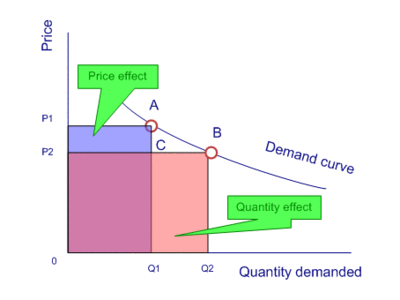

Source: https://en.wikipedia.org/wiki/Total_revenue_test